## <span style="color:#191970">1. Introdução sobre os dados</span>

Ao longo desse notebook iremos analisar alguns dados da Mega-Sena que vão do primeiro concurso em 1

Antes de começarmos a trabalhar com os dados, é importante fazer a importação das bibliotecas necessárias:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Atribuir o nome da planilha para a variável "arquivo"
arquivo = 'basedados.xlsx'
# Carregar a base de dados para um objeto pandas.io.excel.ExcelFile
excel = pd.ExcelFile(arquivo)
# Carregar a planilha excel para um objeto dataframe
data = excel.parse(0)

## <span style="color:#191970">2. Existe um jeito mais vantajoso de escolher os números?</span>

Quando jogamos na Mega-sena, existem diversos critérios que podem ser tomados na escolha dos números. Algumas pessoas optam por colocar a data de aniversário dos familiares, outras colocam os números que consideram ser o "seu número da sorte", outras que simplesmente jogam números aleatórios...Mas existem também indivíduos que preferem desenvolver o seu jogo de uma maneira mais "matemática" e para isso criam cáculos baseados nos números sorteados anteriormente para decidir quais números irão jogar. A grande questão que iremos discutir é: Será que esses cálculos podem ser relevantes de alguma forma, ou são uma grande perda de tempo?  

Para fazer essa análise, ao longo desse notebook, desenvolveremos um método próprio e não muito complexo para a escolha de 4 números da Mega-Sena e então verificaremos o quão eficiente ele teria sido se tivessemos aplicado ele para os jogos do dataset.

<span style="color:##191970">**A nossa hipótese é:** </span>
- <span style="color:#CD950C">**Se existe um número que aparece muitas vezes, mas que está há muito tempo sem aparecer, ele provavelmente irá aparecer em breve.**</span> Então, propomos o seguinte: se montarmos um jogo e nele colocarmos **4 números**que estejam entre os que **mais saíram nos concursos anteriores** e que também estão entre os números que **estão há mais rodadas seguidas sem sair**, as chances de acertamos o jogo é maior. Isso porque, acreditamos que **pelo menos 1 desses 4 números será sorteado**. 

<span style="color:##191970">**Para escolher os quatro números, devemos:**</span> 
- <span style="background-color:##E8E8E8; ">  Primeira Etapa:</span>  Montar uma **tabela com os números foram mais sorteados nos concursos anteriores**, na qual o primeiro elemento é o número que mais saiu.
- <span style="background-color:##E8E8E8; ">  Segunda Etapa:</span>  Montar uma segunda **tabela com os números que estão a mais tempo sem ser sorteado até aquele concurso**, na qual o primeiro elemento é aquele que está a mais rodadas sem ser sorteado.
- <span style="background-color:##E8E8E8; ">  Terceira Etapa:</span>  Depois criaremos uma terceira **tabela onde iremos levar em consideração a soma:** <span style="color:#CD950C">**posição do número na primeira tabela + a posição do número na segunda tabela**</span>. Nesta tabela, o primeiro elemento será aquele que a soma deu o menor valor, ou seja, aquele que está numa posição relativamente mais acima na primeira e na segunda tabela.
- <span style="background-color:##E8E8E8; ">  Quarta Etapa:</span>  Feito isso, os **4 primeiros números** da terceira tabela serão os números escolhidos para serem jogados no concurso em questão.

Para entender melhor a lógica proposta vejamos um exemplo meramente ilustrativo:

<img width="600" alt="tabela1" src="https://drive.google.com/uc?export=view&id=1d-4Gm_DGPwlZxWQFcsAwOOmvBLdrKYMY">
<img width="600" alt="tabela1" src="https://drive.google.com/uc?export=view&id=1vDVRE2ghPGTKI1Pb6Udb5xSuRrwhA-xA">
<img width="600" alt="tabela1" src="https://drive.google.com/uc?export=view&id=1twxyhMeDkjy7kn2GOePJ2kQCLSJu8KUe">


<span style="color:##191970">**Para verificar a nossa hipótese vamos fazer o seguinte:** </span>
- Para cada concurso, após a escolha dos quatro números, veremos **quantas vezes pelo menos 1 dos 4 números foi, de fato, sorteado**, verificando se o método foi eficiente ou não. E então, calcularemos em **quantos porecento do total de concursos** o objetivo de acertar 1 número foi atingido.Assim, será possível visualizar o quão relevante é esse processo de escolha dos números.


### <span style="color:##191970">2.1. Construindo a lógica de cada etapa</span>

#### <span style="color:##191970">a) Montando a Tabela 1</span>

>```python
n_sorteados=[] #crio uma lista para guardar os valores sorteados
c = concurso_x #crio a variável o que vai armazenar o número do concurso
colunas = ['Dezena1','Dezena2', 'Dezena3', 'Dezena4' , 'Dezena5', 'Dezena6']
for i in range(c): #percorre concursos anteriores
    for k in colunas: #percorre cada uma das dezenas
        j = data[k].iloc[i] #descobre o valor sorteado naquela dezena 
        n_sorteados.append(j) #adiciona ao n_sorteados o valor descoberto   
aparicoes={} #cria o dicionário para as apariçoes de cada número   
for i in set(n_sorteados): #para cada valor sorteado
    aparicoes[i] = n_sorteados.count(i) #dizemos quantas vezes ele aparece    
chaves = [] #cria uma lista para receber as chaves
valores = [] #cria uma lista para receber os valores
for i,j in aparicoes.items():#para cada item em aparições
    chaves.append(i) #adiciona os valores da lista chave
    valores.append(j) #adiviona os valores da lista value
B = {'Numero':chaves, 'Repeticoes':valores} #cria um dicionário B com os valores das chavez e dos valores
tab1= pd.DataFrame(data = B) #assim é possível criar um dataframe que será a tabela 1 
tab1 = tab1.sort_values(by=['Repeticoes'], ascending = False) #ordenamos o DataFrame pelo número de aparições e do maior para o menor
```

#### <span style="color:##191970">b) Montando a Tabela 2</span>

>```python
ultima_aparicao = {} #crio dicionário para armazenar a última aparição do número
for j in set(n_sorteados): #para cada número
    for i in range(c): #do primeiro ao ultimo concurso
        for k in colunas:
            if j == data[k].iloc[i]: # se o i for igual a uma das dezenas sorteadas 
                ultima_aparicao[j] = data['Data Sorteio'].iloc[i] #colocamos data do concurso no dicionário
chaves = [] #cria uma lista para receber as chaves
valores = [] #cria uma lista para receber os valores
for i,j in ultima_aparicao.items():
    chaves.append(i) #adiciona os valores da lista chave
    valores.append(j) #adiviona os valores da lista value 
C = {'Numero':chaves, 'Última Aparição':valores} #cria um dicionário C com os valores das chavez e dos valores
tab2 = pd.DataFrame(data=C) #assim é possível criar um dataframe que será a tabela 2 
tab2 = tab2.sort_values('Última Aparição') #ordenamos o DataFrame pelo ultima aparição da mais antiga para a mais atual
```


#### <span style="color:##191970">c) Montando a Tabela 3</span>

>```python
soma_posicoes = {} #crio dicionário para armazenar as somas
posicao_tab1 = {}#crio dicionário para armazenar as posições da tabela1
posicao_tab2 = {}#Crio dicionário para armazenar as posições da tabela2
for j in set(n_sorteados):#para cada valor sorteado
    index_tab1 = pd.Index(tab1.Numero)
    posicao_tab1[j] = index_tab1.get_loc(j)#pego a posição do j na tabela 1    
for j in set(n_sorteados):#para cada valor sorteado
    index_tab2 = pd.Index(tab2.Numero)
    posicao_tab2[j] = index_tab2.get_loc(j)#pego a posição do j na tabela 2
for i in set(n_sorteados):    
    soma_posicoes[i]= posicao_tab1[i] + posicao_tab2[i] 
chaves = [] #cria uma lista para receber as chaves
valores = [] #cria uma lista para receber os valores
for i,j in soma_posicoes.items():
    chaves.append(i) #adiciona os valores da lista chave
    valores.append(j) #adiviona os valores da lista value    
D = {'Numero':chaves, 'Soma das posições':valores} #cria um dicionário D com os valores das chavez e dos valores
tab3 = pd.DataFrame(data=D) #assim é possível criar um dataframe que será a tabela 3 
tab3 = tab3.sort_values('Soma das posições') #ordenamos o DataFrame pelo número de aparições e do menor para o maior
```

#### <span style="color:##191970">d) Escolhendo os 4 Números</span>

>```python
Quatro_numeros= tab3.Numero.iloc[0:4].tolist()#na coluna Numero da tabela 3 , busco os 4 primeiros valores
```




#### <span style="color:##191970">e) Verificando se um dos números foi sorteado</span>

>```python
for i in colunas:#para cada dezena
    for j in Quatro_numeros: #para cada palpite
        if j == data[i].loc[c]: # verifica se naquele concurso o palpite foi certo
            data['Acertos Palpite'][c]+=1
```


### <span style="color:##191970">2.2 Aplicando em todos os concursos</span>

Agora que já temos a lógica para a construção de cada uma das etapas iremos junta-las numa única célula para podermos aplicar o método a cad um dos concursos.

In [12]:
for i in data:
    data['Acertos Palpite']= 0 #Adiciona a coluna ao dataset, com todos os valore iguais a 0
    
for x in range(2025):
    n_sorteados=[]
    c = x
    a = c-10 # Quero Utilizar apenas os 10 valores anteriores
    if a <0:
        a=0
        
    #Código para descobrir a tabela 1
    colunas = ['Dezena1','Dezena2', 'Dezena3', 'Dezena4' , 'Dezena5', 'Dezena6']
    for i in range(a,c): 
        for k in colunas:
            j = data[k].iloc[i] 
            n_sorteados.append(j) 
    aparicoes={}  
    for i in set(n_sorteados): 
        aparicoes[i] = n_sorteados.count(i)   
    chaves = [] 
    valores = [] 
    for i,j in aparicoes.items():
        chaves.append(i)
        valores.append(j) 
    B = {'Numero':chaves, 'Repeticoes':valores} 
    tab1= pd.DataFrame(data = B) 
    tab1 = tab1.sort_values(by=['Repeticoes'], ascending = False) 
    
    #Código para descobrir a tabela 2
    ultima_aparicao = {}
    for j in set(n_sorteados): 
        for i in range(a,c):
            for k in colunas:
                if j == data[k].iloc[i]:  
                    ultima_aparicao[j] = data['Data Sorteio'].iloc[i]
    chaves = [] 
    valores = [] 
    for i,j in ultima_aparicao.items():
        chaves.append(i) 
        valores.append(j)
    C = {'Numero':chaves, 'Última Aparição':valores} 
    tab2 = pd.DataFrame(data=C) 
    tab2 = tab2.sort_values('Última Aparição') 
    
    #Código para descobrir tabela 3
    soma_posicoes = {}
    posicao_tab1 = {}
    posicao_tab2 = {}
    for j in set(n_sorteados): 
        index_tab1 = pd.Index(tab1.Numero)
        posicao_tab1[j] = index_tab1.get_loc(j) 
    for j in set(n_sorteados):
        index_tab2 = pd.Index(tab2.Numero)
        posicao_tab2[j] = index_tab2.get_loc(j)
    for i in set(n_sorteados):    
        soma_posicoes[i]= posicao_tab1[i] + posicao_tab2[i]
    chaves = [] 
    valores = []
    for i,j in soma_posicoes.items():
        chaves.append(i) 
        valores.append(j)
    D = {'Numero':chaves, 'Soma das posições':valores}
    tab3 = pd.DataFrame(data=D)
    tab3 = tab3.sort_values('Soma das posições')
    
    #Escolhe os 4 Números
    Quatro_numeros= tab3.Numero.iloc[0:4].tolist()
    
    #Verifica e coloca na coluna Acertos Palpite
    for i in colunas:
        for j in Quatro_numeros:
            if j == data[i].loc[c]:
                data['Acertos Palpite'][c]+=1
    
 
    

/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### <span style="color:##191970">2.3 Vendo a Eficiência do Método</span>

In [37]:
#criar uma pivot table 
tab_eficiencia = data.pivot_table(index="Acertos Palpite",
                 values = "Concurso",
                 aggfunc=lambda x: 100*(len(x)/len(data))) 
#Calcula em quantos porcento do total o método acertou 0, 1, 2 ou 3 números

tab_eficiencia.rename(columns={'Concurso':'Porcentagem'}, inplace=True)

tab_eficiencia

,Porcentagem
Acertos Palpite,
0,64.098765
1,31.407407
2,4.345679
3,0.148148


analiseeeee

KeyError: 'Acertos Palpite'

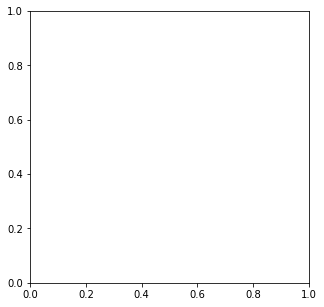

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

valor_x = tab_eficiencia['Acertos Palpite'].tolist()
valor_y = tab_eficiencia.Porcentagem.tolist()


for i in range(0,4):
    ax=data.plot(kind='bar',x=valor_x[i], y = valor_y[i],
                   title= 'Eficiência do Método',
                   color=['blue','yellow'], legend=False,
                   ax=axes[i//2, i%2])
for key, spine in ax.spines.items():
    spine.set_visible(False)
    ax.legend(loc='best',labels=['Porcentagens','Acertos'])



## <span style="color:##191970">3. Conclusão</span>

Como a Mega-Sena se trata de um jogo de azar, infelizmente, afirmar que existe um método de escolha que **é** mais vantajoso ou afirmar que podemos **prever** os números que serão sorteados não é algo que podemos fazer. No entanto, diante das análises que foram apresentadas ao longo desse notebook, somos capazes de dizer que para os jogos anteriores o método proposto **foi**, sim, vantajoso e que muitos dos números que **prevemos**, de fato, foram sorteados. Sendo assim, é razoável concluir que a aplicação de uma lógica na escolha dos números da Mega-sena nem sempre será algo inútil ou irrelevante como muitos pensam que é, e que é interessante desenvolver um raciocínio de jogo quando se tem tantos dados disponíveis para serem estudados. 
